In [1]:
from sklearn import datasets
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

iris = datasets.load_iris()
x, y = iris['data'].reshape(-1, 4), iris['target'].reshape(-1, 1)

In [2]:
x_petal_width = x[:, 3].reshape(-1, 1)
y_virgi = (y == 2).astype(np.int).reshape(-1, 1)

In [3]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_petal_width, y_virgi)

x_validation = np.linspace(0, 3, 1000).reshape(-1,1)
y_prob = log_reg.predict_proba(x_validation)

/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


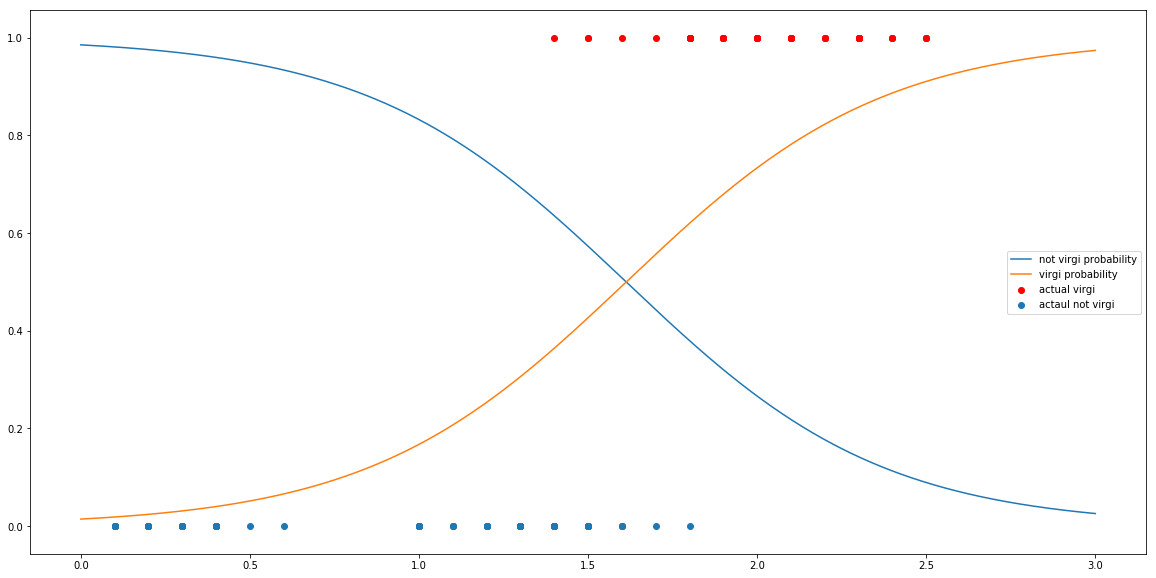

In [7]:
rcParams['figure.figsize'] = 20, 10
plt.plot(x_validation, y_prob[:, 0], label='not virgi probability')
plt.plot(x_validation, y_prob[:, 1], label='virgi probability')

petal_widht_virgi = x_petal_width[y_virgi == 1]
petal_widht_not_virgi = x_petal_width[y_virgi == 0]

plt.scatter(petal_widht_virgi, np.ones((len(petal_widht_virgi), 1)), c='r', label='actual virgi')
plt.scatter(petal_widht_not_virgi, np.zeros((len(petal_widht_not_virgi), 1)), label='actaul not virgi')

plt.legend()


In [15]:
#decision boundary is the point where model return the same probability for both positive and negative
#in this case, it is about 1.6
some_petal_widht = [[1.5], 
                    [1.6],
                    [1.61225],
                    [1.625],
                    [1.65],
                    [1.7]]

log_reg.predict_proba(some_petal_widht)

array([[0.5732246 , 0.4267754 ],
       [0.50832222, 0.49167778],
       [0.50030758, 0.49969242],
       [0.4919657 , 0.5080343 ],
       [0.47562635, 0.52437365],
       [0.4431381 , 0.5568619 ]])

In [16]:
log_reg.predict(some_petal_widht)

array([0, 0, 0, 1, 1, 1])